# Your Title Here

**Name(s)**: Morgan Stevenson, Arah Sanders

**Website Link**: (your website link)

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path

import plotly.express as px
pd.options.plotting.backend = 'plotly'

# from dsc80_utils import * # Feel free to uncomment and use this.

## Step 1: Introduction

In [3]:
'''
The question we want to investigate further is if easier recipes tend to be rated higher than ones that are less easy. 
'''

'\nThe question we want to investigate further is if easier recipes tend to be rated higher than ones that are less easy. \n'

## Step 2: Data Cleaning and Exploratory Data Analysis

In [4]:
# rename ratings 'recipe_id' column to 'id' for merging
ratings = pd.read_csv(Path('data') / 'interactions.csv').rename(columns={'recipe_id':'id'})
recipes = pd.read_csv(Path('data') / 'RAW_recipes.csv')

In [5]:
# merge on left for recipes
merged = recipes.merge(ratings, on='id', how='left')
# change 0 ratings to np.nan
merged.loc[merged['rating'] == 0, 'rating'] = np.nan

# average rating
avg_rating = merged.groupby('id')['rating'].mean().reset_index().rename(columns={'rating':'average rating'})
df = merged.merge(avg_rating, on='id', how='left')

# fix types
df['submitted'] = pd.to_datetime(df['submitted'], format='%Y-%m-%d')
df['tags'] = df['tags'].apply(lambda x: eval(x))
df['nutrition'] = df['nutrition'].apply(lambda x: eval(x))
df['steps'] = df['steps'].apply(lambda x: eval(x))
df['ingredients'] = df['ingredients'].apply(lambda x: eval(x))
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['rating'] = df['rating'].astype('Int8')
df

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,date,rating,review,average rating
0,1 brownies in the world best ever,333281,40,985201,2008-10-27,"[60-minutes-or-less, time-to-make, course, mai...","[138.4, 10.0, 50.0, 3.0, 3.0, 19.0, 6.0]",10,[heat the oven to 350f and arrange the rack in...,"these are the most; chocolatey, moist, rich, d...","[bittersweet chocolate, unsalted butter, eggs,...",9,3.865850e+05,2008-11-19,4,"These were pretty good, but took forever to ba...",4.0
1,1 in canada chocolate chip cookies,453467,45,1848091,2011-04-11,"[60-minutes-or-less, time-to-make, cuisine, pr...","[595.1, 46.0, 211.0, 22.0, 13.0, 51.0, 26.0]",12,"[pre-heat oven the 350 degrees f, in a mixing ...",this is the recipe that we use at my school ca...,"[white sugar, brown sugar, salt, margarine, eg...",11,4.246800e+05,2012-01-26,5,Originally I was gonna cut the recipe in half ...,5.0
2,412 broccoli casserole,306168,40,50969,2008-05-30,"[60-minutes-or-less, time-to-make, course, mai...","[194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]",6,"[preheat oven to 350 degrees, spray a 2 quart ...",since there are already 411 recipes for brocco...,"[frozen broccoli cuts, cream of chicken soup, ...",9,2.978200e+04,2008-12-31,5,This was one of the best broccoli casseroles t...,5.0
3,412 broccoli casserole,306168,40,50969,2008-05-30,"[60-minutes-or-less, time-to-make, course, mai...","[194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]",6,"[preheat oven to 350 degrees, spray a 2 quart ...",since there are already 411 recipes for brocco...,"[frozen broccoli cuts, cream of chicken soup, ...",9,1.196280e+06,2009-04-13,5,I made this for my son's first birthday party ...,5.0
4,412 broccoli casserole,306168,40,50969,2008-05-30,"[60-minutes-or-less, time-to-make, course, mai...","[194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]",6,"[preheat oven to 350 degrees, spray a 2 quart ...",since there are already 411 recipes for brocco...,"[frozen broccoli cuts, cream of chicken soup, ...",9,7.688280e+05,2013-08-02,5,Loved this. Be sure to completely thaw the br...,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234424,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"[60-minutes-or-less, time-to-make, course, mai...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"[in a bowl , combine the mashed yolks and mayo...","deviled eggs, cajun-style","[hard-cooked eggs, mayonnaise, dijon mustard, ...",8,8.445540e+05,2009-10-14,5,These were very good. I meant to add some jala...,5.0
234425,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"[30-minutes-or-less, time-to-make, course, pre...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,[place melted butter in a large mixing bowl an...,"i've heard of the 'cookies by design' company,...","[butter, eagle brand condensed milk, light bro...",10,8.042340e+05,2008-05-02,1,I would rate this a zero if I could. I followe...,1.0
234426,cookies by design sugar shortbread cookies,298509,20,506822,2008-04-15,"[30-minutes-or-less, time-to-make, course, pre...","[174.9, 14.0, 33.0, 4.0, 4.0, 11.0, 6.0]",5,"[whip sugar and shortening in a large bowl , a...","i've heard of the 'cookies by design' company,...","[granulated sugar, shortening, eggs, flour, cr...",7,8.666510e+05,2008-06-19,1,This recipe tastes nothing like the Cookies by...,3.0
234427,cookies by design sugar shortbread cookies,298509,20,506822,2008-04-15,"[30-minutes-or-less, time-to-make, course, pre...","[174.9, 14.0, 33.0, 4.0, 4.0, 11.0, 6.0]",5,"[whip sugar and shortening in a large bowl , a...","i've heard of the 'cookies by design' company,...","[granulated sugar, shortening, eggs, flour, cr...",7,1.546277e+06,2010-02-08,5,"yummy cookies, i love this recipe me and my sm...",3.0


In [6]:
#copy of df to use for model fitting and final model later in notebook
pred_df = df.copy()

In [6]:
cols = ['calories', 'total fat', 'sugar', 'sodium', 'protein', 'saturated fat', 'carbohydrates']
nutrition = df.set_index('id')['nutrition']
nutrition_df = pd.DataFrame(list(nutrition), index=nutrition.index, columns=cols).reset_index()
df = df.merge(nutrition_df, on='id', how='left')

In [7]:
#create df to work with missingness later in notebook
missing = df.copy()

In [8]:
# Subset data frame to only include columns of interest
# Keep only the relevant columns and reassign to df
df = df[['name', 'id', 'minutes', 'n_steps', 'n_ingredients', 'rating', 'average rating']]

In [9]:
df['rating'].describe()

count    2300464.0
mean      4.690432
std       0.781537
min            1.0
25%            5.0
50%            5.0
75%            5.0
max            5.0
Name: rating, dtype: Float64

In [10]:
df['average rating'].describe()

count    2.535484e+06
mean     4.683070e+00
std      3.410608e-01
min      1.000000e+00
25%      4.568966e+00
50%      4.767442e+00
75%      4.935484e+00
max      5.000000e+00
Name: average rating, dtype: float64

In [11]:
df['n_ingredients'].describe()

count    2.538649e+06
mean     9.168323e+00
std      4.129953e+00
min      1.000000e+00
25%      6.000000e+00
50%      8.000000e+00
75%      1.100000e+01
max      3.700000e+01
Name: n_ingredients, dtype: float64

In [12]:
df['n_steps'].describe()

count    2.538649e+06
mean     1.142538e+01
std      8.061948e+00
min      1.000000e+00
25%      6.000000e+00
50%      1.000000e+01
75%      1.400000e+01
max      1.000000e+02
Name: n_steps, dtype: float64

In [13]:
df['minutes'].describe()

count    2.538649e+06
mean     1.719288e+02
std      1.896397e+03
min      0.000000e+00
25%      2.000000e+01
50%      4.000000e+01
75%      7.000000e+01
max      1.051200e+06
Name: minutes, dtype: float64

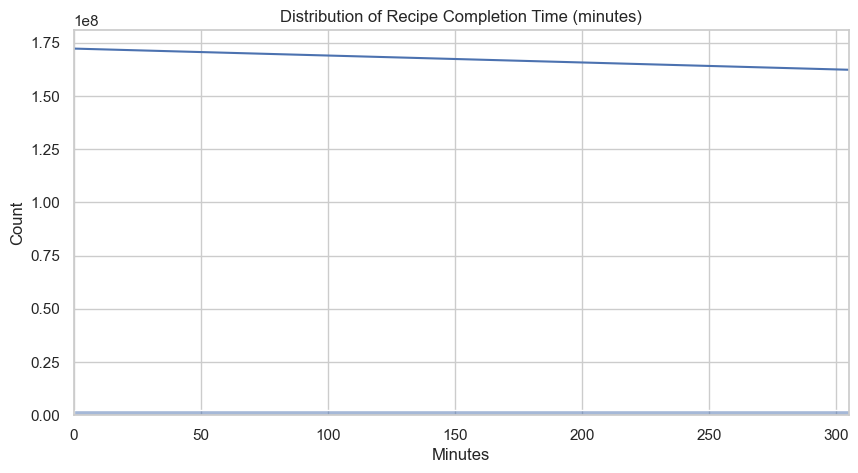

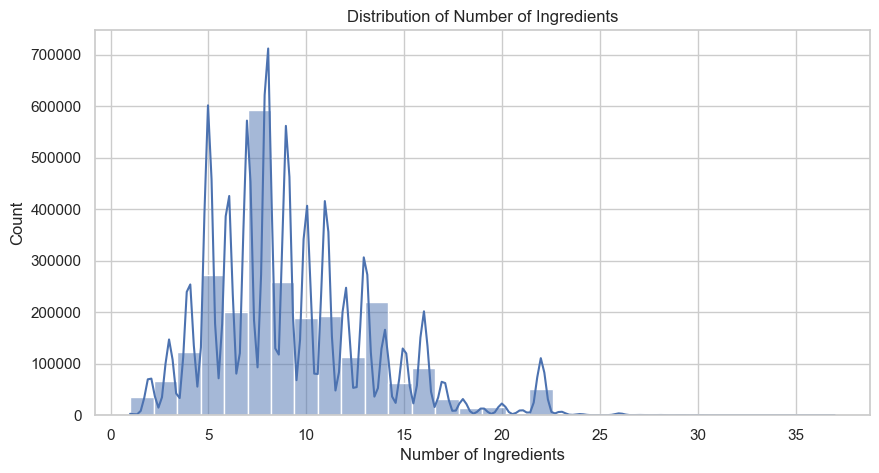

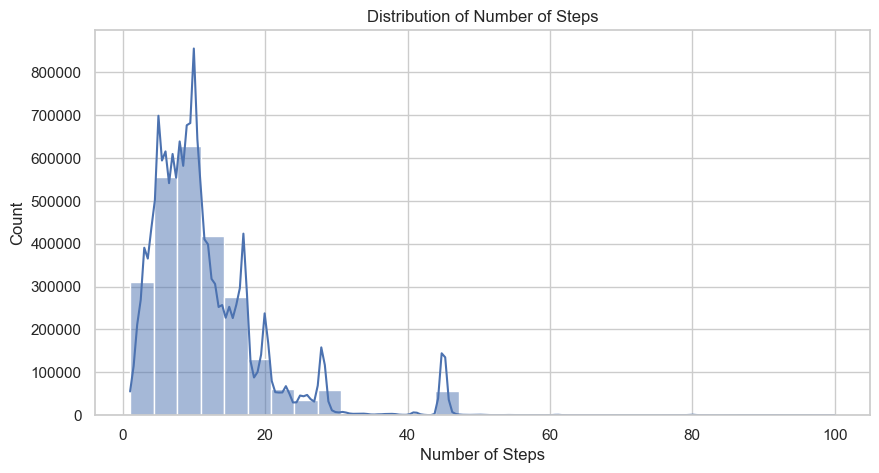

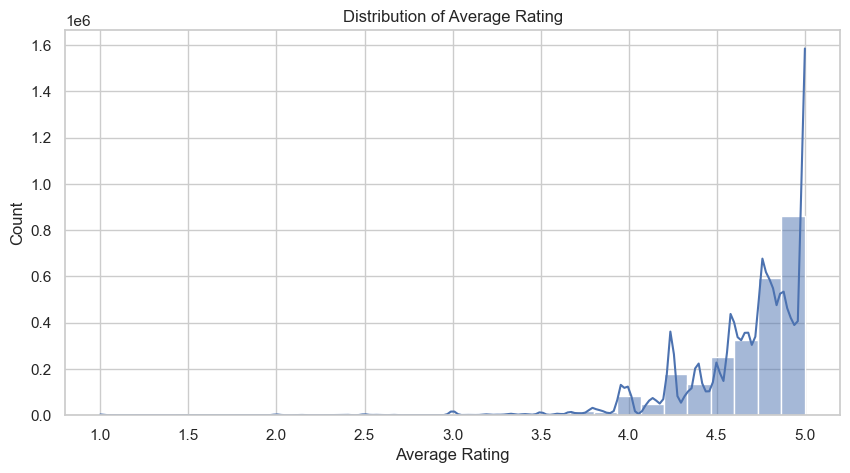

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Histogram for 'minutes'
plt.figure(figsize=(10, 5))
sns.histplot(df['minutes'], bins=50, kde=True)
plt.title('Distribution of Recipe Completion Time (minutes)')
plt.xlabel('Minutes')
plt.ylabel('Count')
plt.xlim(0, df['minutes'].quantile(0.95))  # Trim extreme outliers
plt.show()

# Histogram for 'n_ingredients'
plt.figure(figsize=(10, 5))
sns.histplot(df['n_ingredients'], bins=30, kde=True)
plt.title('Distribution of Number of Ingredients')
plt.xlabel('Number of Ingredients')
plt.ylabel('Count')
plt.show()

# Histogram for 'n_steps'
plt.figure(figsize=(10, 5))
sns.histplot(df['n_steps'], bins=30, kde=True)
plt.title('Distribution of Number of Steps')
plt.xlabel('Number of Steps')
plt.ylabel('Count')
plt.show()

# Histogram for 'n_steps'
plt.figure(figsize=(10, 5))
sns.histplot(df['average rating'], bins=30, kde=True)
plt.title('Distribution of Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.show()


/var/folders/ch/xc77p32n37v6pfqh60_ls62c0000gn/T/ipykernel_53983/1515630123.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_binned.groupby('minutes_bin')['average rating'].mean().reset_index()


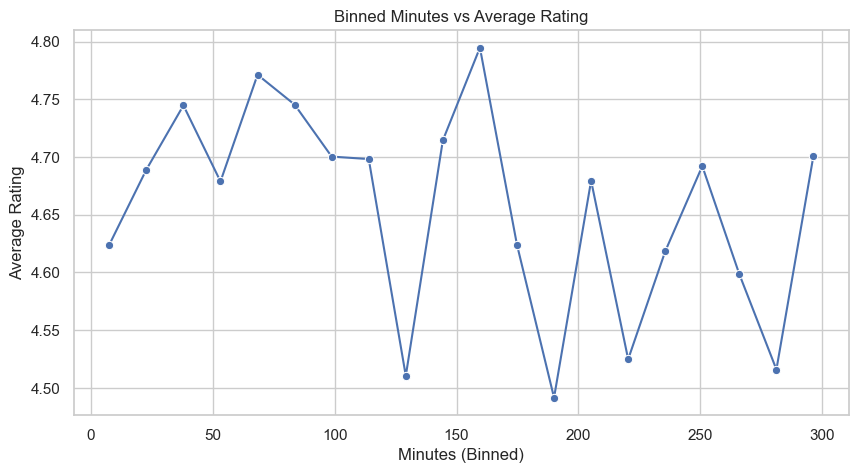

In [15]:
# Bin minutes and calculate mean average_rating per bin
df_binned = df[df['minutes'] < df['minutes'].quantile(0.95)].copy()
df_binned['minutes_bin'] = pd.cut(df_binned['minutes'], bins=20)

grouped = df_binned.groupby('minutes_bin')['average rating'].mean().reset_index()
grouped['midpoint'] = grouped['minutes_bin'].apply(lambda x: x.mid)

plt.figure(figsize=(10, 5))
sns.lineplot(x='midpoint', y='average rating', data=grouped, marker='o')
plt.title('Binned Minutes vs Average Rating')
plt.xlabel('Minutes (Binned)')
plt.ylabel('Average Rating')
plt.show()

/var/folders/ch/xc77p32n37v6pfqh60_ls62c0000gn/T/ipykernel_53983/2365154705.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_ing = df_binned_ing.groupby('ingredients_bin')['average rating'].mean().reset_index()


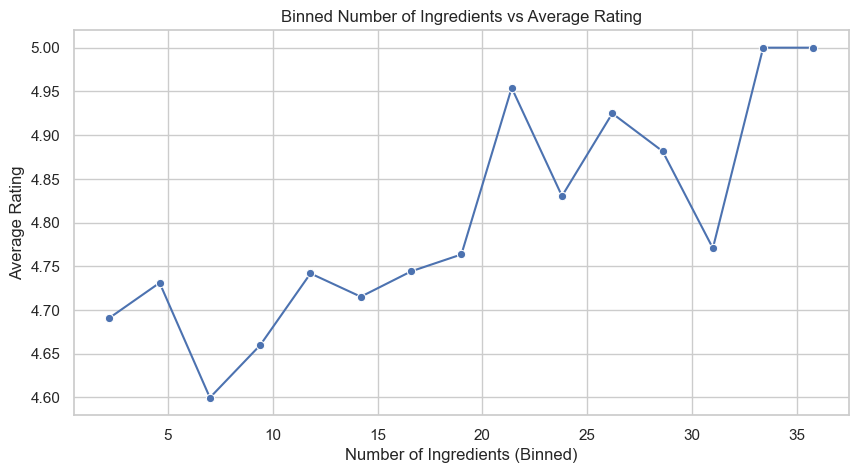

In [16]:
# Bin n_ingredients and calculate mean average_rating per bin
df_binned_ing = df.copy()
df_binned_ing['ingredients_bin'] = pd.cut(df_binned_ing['n_ingredients'], bins=15)

grouped_ing = df_binned_ing.groupby('ingredients_bin')['average rating'].mean().reset_index()
grouped_ing['midpoint'] = grouped_ing['ingredients_bin'].apply(lambda x: x.mid)

plt.figure(figsize=(10, 5))
sns.lineplot(x='midpoint', y='average rating', data=grouped_ing, marker='o')
plt.title('Binned Number of Ingredients vs Average Rating')
plt.xlabel('Number of Ingredients (Binned)')
plt.ylabel('Average Rating')
plt.show()


In [19]:
# Create bins for each difficulty metric
df['steps_bin'] = pd.cut(df['n_steps'], bins=5)
df['minutes_bin'] = pd.cut(df['minutes'], bins=5)
df['ingredients_bin'] = pd.cut(df['n_ingredients'], bins=5)

# Group by each bin and calculate average rating and mean rating per review
grouped_steps = df.groupby('steps_bin')[['average rating', 'rating']].mean().reset_index()
grouped_minutes = df.groupby('minutes_bin')[['average rating', 'rating']].mean().reset_index()
grouped_ingredients = df.groupby('ingredients_bin')[['average rating', 'rating']].mean().reset_index()

# View summary tables
print("Grouped by Steps:\n", grouped_steps)
print("\nGrouped by Minutes:\n", grouped_minutes)
print("\nGrouped by Ingredients:\n", grouped_ingredients)

Grouped by Steps:
        steps_bin  average rating    rating
0  (0.901, 20.8]        4.678380  4.685029
1   (20.8, 40.6]        4.775927  4.789673
2   (40.6, 60.4]        4.611328  4.616384
3   (60.4, 80.2]        4.772977  4.761836
4  (80.2, 100.0]        4.734884      4.74

Grouped by Minutes:
              minutes_bin  average rating    rating
0    (-1051.2, 210240.0]        4.683069  4.690432
1   (210240.0, 420480.0]        4.500000       4.5
2   (420480.0, 630720.0]             NaN      <NA>
3   (630720.0, 840960.0]             NaN      <NA>
4  (840960.0, 1051200.0]        5.000000       5.0

Grouped by Ingredients:
   ingredients_bin  average rating    rating
0    (0.964, 8.2]        4.647115  4.654921
1     (8.2, 15.4]        4.702917  4.709058
2    (15.4, 22.6]        4.802276  4.810557
3    (22.6, 29.8]        4.859621  4.864366
4    (29.8, 37.0]        4.773585  4.773585


/var/folders/ch/xc77p32n37v6pfqh60_ls62c0000gn/T/ipykernel_53983/1886610994.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_steps = df.groupby('steps_bin')[['average rating', 'rating']].mean().reset_index()
/var/folders/ch/xc77p32n37v6pfqh60_ls62c0000gn/T/ipykernel_53983/1886610994.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_minutes = df.groupby('minutes_bin')[['average rating', 'rating']].mean().reset_index()
/var/folders/ch/xc77p32n37v6pfqh60_ls62c0000gn/T/ipykernel_53983/1886610994.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a 

In [20]:
# Bin the 'n_ingredients' column
df['ingredients_bin'] = pd.cut(df['n_ingredients'], bins=5)

# Create pivot table grouped by ingredients_bin
pivot_table_ingredients = df.pivot_table(
    index='ingredients_bin',
    values=['average rating', 'rating'],
    aggfunc='mean'
)

pivot_table_ingredients

/var/folders/ch/xc77p32n37v6pfqh60_ls62c0000gn/T/ipykernel_53983/3067506879.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_ingredients = df.pivot_table(


,average rating,rating
ingredients_bin,,
"(0.964, 8.2]",4.647115,4.654921
"(8.2, 15.4]",4.702917,4.709058
"(15.4, 22.6]",4.802276,4.810557
"(22.6, 29.8]",4.859621,4.864366
"(29.8, 37.0]",4.773585,4.773585


## Step 3: Assessment of Missingness

In [21]:
#Exploring missingness in the data 

# Count of missing values per column
missing_counts = missing.isnull().sum()
missing_percent = (missing_counts / len(missing)) * 100

#df which summarizes missingness in each column
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percent.round(2)
})

missing_summary

,Missing Count,Missing Percentage
name,1,0.00
id,0,0.00
minutes,0,0.00
contributor_id,0,0.00
submitted,0,0.00
tags,0,0.00
nutrition,0,0.00
n_steps,0,0.00
steps,0,0.00
description,266,0.01


In [22]:
#Create a missingness indicator for 'review'
missing['review_missing'] = missing['review'].isnull()

# Step 2: Define permutation test function
def permutation_test(data, col_to_test, missing_col, num_permutations=1000):
    # Actual difference in means between missing/not-missing groups
    group1 = data[data[missing_col] == True][col_to_test].dropna()
    group2 = data[data[missing_col] == False][col_to_test].dropna()
    observed_diff = abs(group1.mean() - group2.mean())

    # Null distribution via permutations
    combined = np.concatenate([group1, group2])
    diffs = []

    for _ in range(num_permutations):
        np.random.shuffle(combined)
        new_group1 = combined[:len(group1)]
        new_group2 = combined[len(group1):]
        diffs.append(abs(new_group1.mean() - new_group2.mean()))

    p_value = np.mean([diff >= observed_diff for diff in diffs])

    # Plot
    sns.histplot(diffs, kde=True)
    plt.axvline(observed_diff, color='red', linestyle='--', label=f'Observed diff = {observed_diff:.4f}')
    plt.title(f'Permutation Test for {col_to_test} vs Missingness in {missing_col}')
    plt.xlabel('Difference in Means (null distribution)')
    plt.legend()
    plt.show()

    return observed_diff, p_value

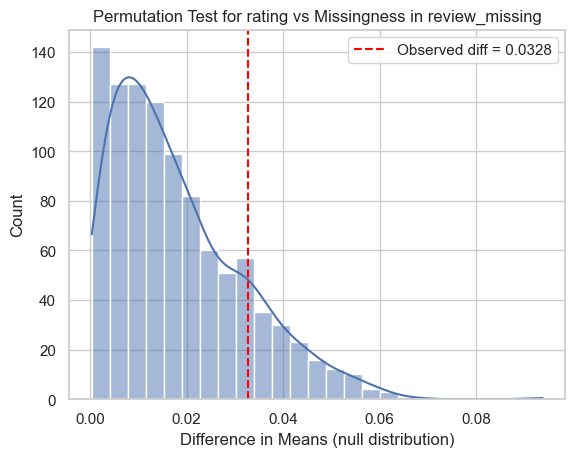

Rating → Review missingness: Observed diff = 0.0328, p-value = 0.1510


In [23]:
obs_diff_rating, p_val_rating = permutation_test(missing, 'rating', 'review_missing')
print(f"Rating → Review missingness: Observed diff = {obs_diff_rating:.4f}, p-value = {p_val_rating:.4f}")

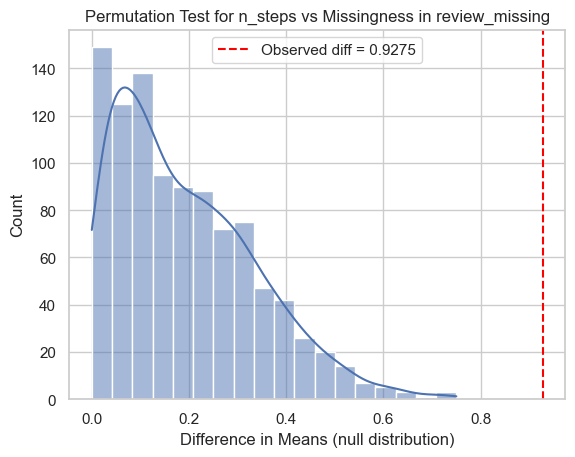

n_steps → Review missingness: Observed diff = 0.9275, p-value = 0.0000


In [24]:
obs_diff_steps, p_val_steps = permutation_test(missing, 'n_steps', 'review_missing')
print(f"n_steps → Review missingness: Observed diff = {obs_diff_steps:.4f}, p-value = {p_val_steps:.4f}")

In [25]:
steps_when_review_missing = missing[missing['review'].isnull()]['n_steps']
steps_when_review_missing.describe()

count    1149.000000
mean       12.352480
std         8.295304
min         6.000000
25%         7.000000
50%         9.000000
75%        15.000000
max       100.000000
Name: n_steps, dtype: float64

## Step 4: Hypothesis Testing

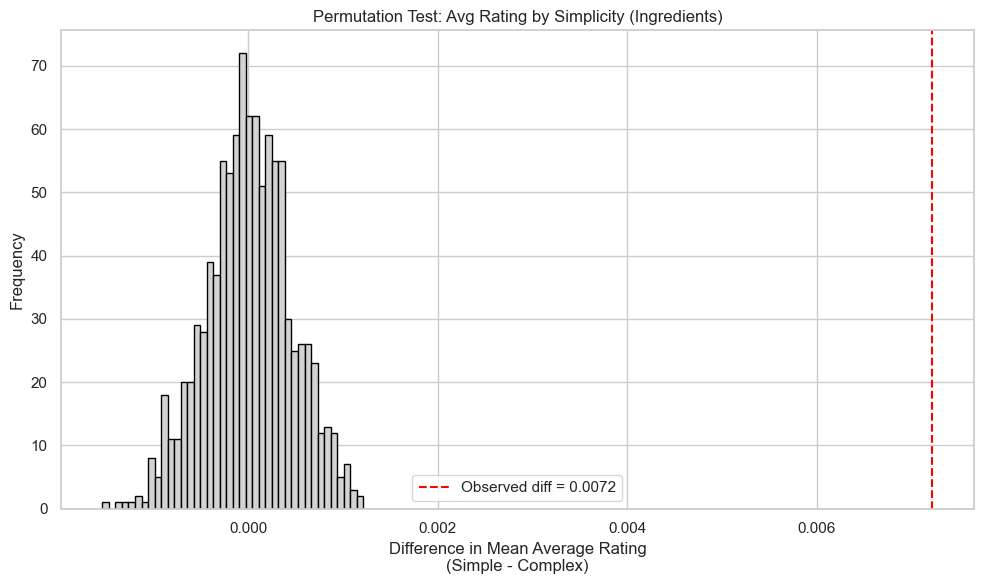

Observed difference in means: 0.0072
P-value: 0.0000


In [26]:
import matplotlib.pyplot as plt

# Drop missing values
df_test = df.dropna(subset=['n_ingredients', 'average rating'])

# Define simple vs complex by median number of ingredients
median_ingredients = df_test['n_ingredients'].median()
simple = df_test[df_test['n_ingredients'] < median_ingredients]['average rating']
complex_ = df_test[df_test['n_ingredients'] >= median_ingredients]['average rating']

# Observed difference in means
observed_diff = simple.mean() - complex_.mean()

# Permutation test
combined = np.concatenate([simple, complex_])
n_permutations = 1000
perm_diffs = []

for _ in range(n_permutations):
    np.random.shuffle(combined)
    perm_simple = combined[:len(simple)]
    perm_complex = combined[len(simple):]
    perm_diffs.append(perm_simple.mean() - perm_complex.mean())

# Calculate p-value
p_value = np.mean(np.array(perm_diffs) >= observed_diff)

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(perm_diffs, bins=40, color='lightgray', edgecolor='black')
plt.axvline(observed_diff, color='red', linestyle='--', label=f'Observed diff = {observed_diff:.4f}')
plt.title('Permutation Test: Avg Rating by Simplicity (Ingredients)')
plt.xlabel('Difference in Mean Average Rating\n(Simple - Complex)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# Print results
print(f"Observed difference in means: {observed_diff:.4f}")
print(f"P-value: {p_value:.4f}")


## Step 5: Framing a Prediction Problem

In [27]:
"""
We aim to predict the individual rating a user might give a recipe based on various observable features of that recipe. Understanding what factors contribute to higher 
or lower ratings can help us better assess recipe quality and user preferences, even before a recipe receives many reviews.
"""

'\nWe aim to predict the individual rating a user might give a recipe based on various observable features of that recipe. Understanding what factors contribute to higher \nor lower ratings can help us better assess recipe quality and user preferences, even before a recipe receives many reviews.\n'

## Step 6: Baseline Model

In [7]:

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Binarizer, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred_df = pred_df.dropna(subset=['rating'])

# Features and target
X = pred_df[['n_steps', 'minutes', 'n_ingredients']]
y = pred_df['rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing using Binarizer for steps (>5 → 1) and minutes (>30 → 1)
preprocessor = ColumnTransformer(transformers=[
    ('steps_bin', Binarizer(threshold=5), ['n_steps']),
    ('minutes_bin', Binarizer(threshold=30), ['minutes'])
],
remainder='passthrough',
force_int_remainder_cols=False)

# Pipeline with linear regression
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])

# Fit model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)

# Evaluation
print("Final Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")


Final Model Evaluation:
Mean Absolute Error (MAE): 0.4960
Mean Squared Error (MSE): 0.5092
R² Score: 0.0008


## Step 7: Final Model

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, QuantileTransformer, FunctionTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

cube_transformer = FunctionTransformer(lambda x: x**3, validate=True)

ppreprocessor = ColumnTransformer(transformers=[
    ('steps_bin', Binarizer(threshold=5), ['n_steps']),
    ('minutes_bin', Binarizer(threshold=30), ['minutes']),
    ('ingredients_cubed_scaled', Pipeline([
        ('cube', cube_transformer),
        ('scale', StandardScaler())
    ]), ['n_ingredients'])
])

# Hyperparameter grids for RandomizedSearchCV
models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}  # No tuning needed
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'regressor__max_depth': randint(3, 15),
            'regressor__min_samples_split': randint(2, 10)
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'regressor__n_estimators': randint(25, 100),
            'regressor__max_depth': randint(5, 15)
        }
    },
}

# Model results container
results = []
best_estimators = {}

for name, config in models.items():
    print(f"Training {name}...")
    
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('regressor', config['model'])
    ])
    
    if config['params']:
        search = RandomizedSearchCV(
            pipeline,
            config['params'],
            n_iter=5,
            cv=3,
            scoring='r2',
            n_jobs=-1,
            random_state=42
        )
    else:
        # No parameters to search for LinearRegression
        search = pipeline
    
    # Fit model
    if isinstance(search, Pipeline):
        search.fit(X_train, y_train)
        y_pred = search.predict(X_test)
        cv_r2 = None  # Not applicable
        best_params = {}
    else:
        search.fit(X_train, y_train)
        y_pred = search.predict(X_test)
        cv_r2 = search.best_score_
        best_params = search.best_params_
        best_estimators[name] = search.best_estimator_
    
    results.append({
        'Model': name,
        'Best Params': best_params,
        'CV R²': cv_r2,
        'Test R²': r2_score(y_test, y_pred),
        'Test MAE': mean_absolute_error(y_test, y_pred),
        'Test MSE': mean_squared_error(y_test, y_pred)
    })

# Compare model results
results_df = pd.DataFrame(results).sort_values(by='Test R²', ascending=False)
print("\nModel Comparison Results:")
print(results_df)

# Best final model
best_model_name = results_df.iloc[0]['Model']
final_model = best_estimators.get(best_model_name, None)
print(f"\n Final Selected Model: {best_model_name}")

Training LinearRegression...
Training DecisionTree...
Training RandomForest...

Model Comparison Results:
              Model                                        Best Params  \
0  LinearRegression                                                 {}   
2      RandomForest  {'regressor__max_depth': 7, 'regressor__n_esti...   
1      DecisionTree  {'regressor__max_depth': 7, 'regressor__min_sa...   

      CV R²   Test R²  Test MAE  Test MSE  
0       NaN  0.001071  0.495879  0.509048  
2  0.001439  0.000994  0.495402  0.509087  
1  0.001391  0.000960  0.495392  0.509105  

 Final Selected Model: LinearRegression


## Step 8: Fairness Analysis

In [ ]:
from sklearn.metrics import mean_squared_error

# Define groups
group_x = X_test['minutes'] <= 30
group_y = X_test['minutes'] > 30

# Predictions
y_pred = final_model.predict(X_test)

# Actual RMSE difference
rmse_x = np.sqrt(mean_squared_error(y_test[group_x], y_pred[group_x]))
rmse_y = np.sqrt(mean_squared_error(y_test[group_y], y_pred[group_y]))
actual_diff = np.abs(rmse_x - rmse_y)
print(f"Actual RMSE difference: {actual_diff:.4f}")

# Permutation test
rmse_diffs = []
n_permutations = 1000
y_test_array = y_test.values  # Convert to NumPy for shuffling

for _ in range(n_permutations):
    shuffled_y = np.random.permutation(y_test_array)
    rmse_x_perm = np.sqrt(mean_squared_error(shuffled_y[group_x], y_pred[group_x]))
    rmse_y_perm = np.sqrt(mean_squared_error(shuffled_y[group_y], y_pred[group_y]))
    rmse_diffs.append(np.abs(rmse_x_perm - rmse_y_perm))

# Compute p-value
p_value = np.mean([diff >= actual_diff for diff in rmse_diffs])
print(f"P-value from permutation test: {p_value:.4f}")


Actual RMSE difference: 0.0463
P-value from permutation test: 0.0000


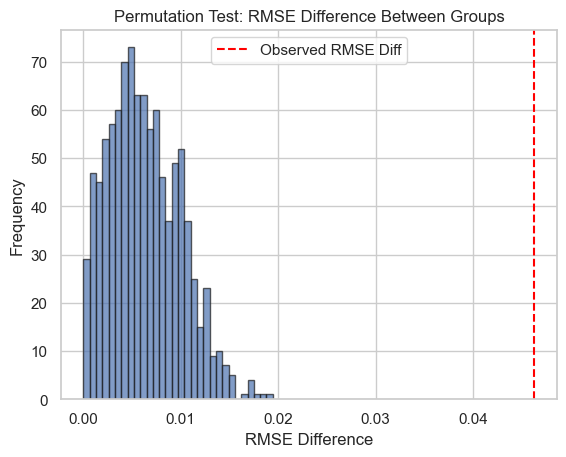

In [38]:
import matplotlib.pyplot as plt

plt.hist(rmse_diffs, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(actual_diff, color='red', linestyle='--', label='Observed RMSE Diff')
plt.title("Permutation Test: RMSE Difference Between Groups")
plt.xlabel("RMSE Difference")
plt.ylabel("Frequency")
plt.legend()
plt.show()
